### Importing Necessary Libraries

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
df = pd.read_csv('Cleaned_Austin_House_Price.csv')

In [5]:
df.head()

,Unnamed: 0,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,basement,yr_built,renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,0,221900,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,1,538000,3,2.25,2570,7242,2.0,0,0,3,7,2170,1,1951,1,98125,47.7210,-122.319,1690,7639
2,2,180000,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,3,604000,4,3.00,1960,5000,1.0,0,0,5,7,1050,1,1965,0,98136,47.5208,-122.393,1360,5000
4,4,510000,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [6]:
df.drop('Unnamed: 0', axis = 1, inplace = True)

In [7]:
df.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,basement,yr_built,renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,221900,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,538000,3,2.25,2570,7242,2.0,0,0,3,7,2170,1,1951,1,98125,47.7210,-122.319,1690,7639
2,180000,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,604000,4,3.00,1960,5000,1.0,0,0,5,7,1050,1,1965,0,98136,47.5208,-122.393,1360,5000
4,510000,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


### Checking Whether Austin House Prices are Normally Distributed or Not?

In [9]:
# Implement the bootstrapping functions from the Datacamp Course: Statistical Thinking in Python (Part 1)
# Author: Justin Bois
def ecdf(data):
    """Compute ECDF for a one-dimensional array of measurements."""
    
    # Number of data points: n
    n= len(data)
    
    # x-data for the ECDF: x
    x = np.sort(data)
    
    # y-data for the ECDF: y
    y = np.arange(1, n+1) / float(n)
    
    return x, y

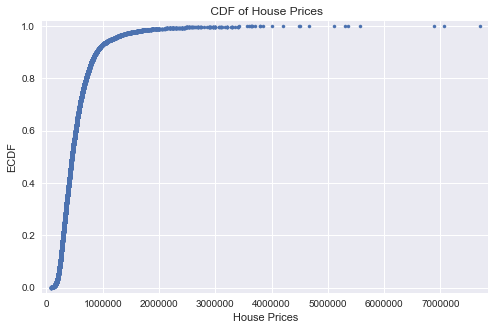

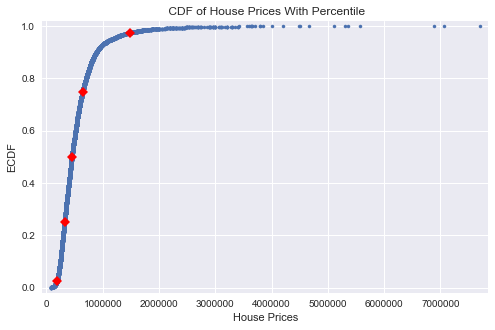

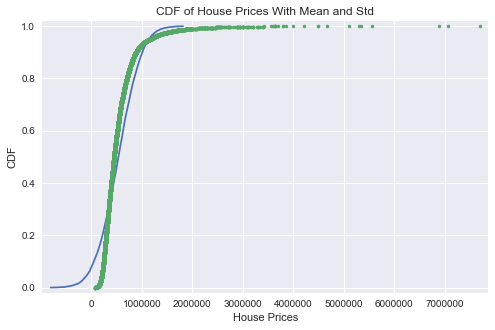

In [10]:
sns.set()
temp_np_array = np.array(df.price)

# Compute ECDF for versicolor data: x_vers, y_vers
x_temp, y_temp = ecdf(temp_np_array)
plt.figure(figsize = (8,5))
# Generate plot
_ = plt.plot(x_temp, y_temp, marker = '.', linestyle = 'none')

# Make the margins nice
plt.margins(0.02)

# Label the axes
_ = plt.xlabel('House Prices')
_ = plt.ylabel('ECDF')
_ = plt.title(' CDF of House Prices')
# Display the plot
plt.show()

# Specify array of percentiles: percentiles
percentiles = np.array([2.5,25,50,75,97.5])

# Compute percentiles: ptiles_vers
ptiles_temp = np.percentile(temp_np_array, percentiles)

# Print the result
#print (ptiles_temp)

x_temp, y_temp = ecdf(temp_np_array)
plt.figure(figsize = (8,5))

# Generate plot
_ = plt.plot(x_temp, y_temp, marker = '.', linestyle = 'none')

# Make the margins nice
plt.margins(0.02)

# Label the axes
_ = plt.xlabel('House Prices')
_ = plt.ylabel('ECDF')
_ = plt.title(' CDF of House Prices With Percentile')
# Display the plot

# Overlay percentiles as red diamonds.
_ = plt.plot(ptiles_temp, percentiles/100, marker='D', color='red', linestyle='none')

plt.show()

# Compute mean and standard deviation: mu, sigma
mu = np.mean(temp_np_array)
sigma = np.std(temp_np_array)

# Sample out of a normal distribution with this mu and sigma: samples
samples = np.random.normal(mu,sigma, size = 10000)

# Get the CDF of the samples and of the data
x_theor, y_theor = ecdf(samples)
x, y = ecdf(temp_np_array)
# Plot the CDFs and show the plot
plt.figure(figsize = (8,5))
_ = plt.plot(x_theor, y_theor)
_ = plt.plot(x, y, marker='.', linestyle='none')
plt.margins(0.02)
_ = plt.xlabel('House Prices')
_ = plt.ylabel('CDF')
_ = plt.title('CDF of House Prices With Mean and Std')
plt.show()

**There appears that house prices are normally distributed, but skewed a bit right.**

In [13]:
# Implement the bootstrapping functions from the Datacamp Course: Statistical Thinking in Python (Part 2)
# Author: Justin Bois

def bootstrap_replicate_1d(data, func):
    return func(np.random.choice(data, size=len(data)))   
## Create a function to draw the boot-strap samples
def draw_bs_reps(data, func, size=1):
    bs_replicates = np.empty(size)
    for i in range(size):
            bs_replicates[i] = bootstrap_replicate_1d(data, func)            
    return bs_replicates

c:\users\mike\anaconda2\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


Text(0.5,1,'Distribution of House Prices Mean')

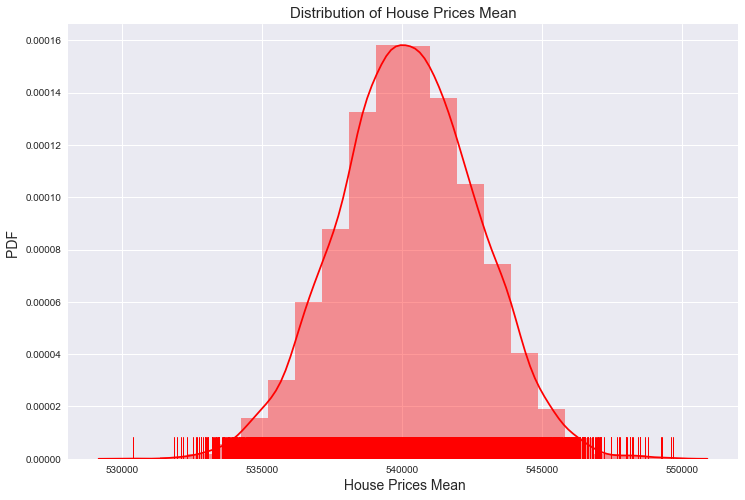

In [14]:
temp_np_array = np.array(df.price)
bs_replicates  = draw_bs_reps(temp_np_array, np.mean, 10000)
plt.figure(figsize=(12,8))
sns.distplot(bs_replicates, rug='True', bins=20, color = 'red')
plt.xlabel(" House Prices Mean", fontsize=14)
plt.ylabel('PDF ', fontsize=14)
plt.title("Distribution of House Prices Mean", fontsize=15)